In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import cm, colors

In [ ]:
prefix = "DD25"       # set to TDD for Thawing Degree Days

config = {
    "TDD": {
        "deltaT": 32
    },
    "DD20": {
        "deltaT": 20
    },
    "DD25": {
        "deltaT": 25
    },
}

PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / f"data/weatherstations/ACIS/{prefix}/dd_climatologies"

In [ ]:
stations_ddclim = stationdata.glob("*.csv")
stations_ddclim_list = list(stations_ddclim)

## Prototyping

In [ ]:
testdata = pd.read_csv(stations_ddclim_list[3], skiprows=4, index_col=0)
testdata

,Tavg_F,dd
d_since_march1,,
0,7.33,0.00
1,4.54,0.00
2,5.13,0.00
3,6.68,0.00
4,8.46,0.00
...,...,...
117,61.28,36.28
118,60.83,35.83
119,60.87,35.87


In [ ]:
stationname = stations_ddclim_list[3].stem[:-14]
testdf = pd.DataFrame(testdata['dd'].cumsum())
testdf.columns = [stationname]
testdf

,COLLEGE_OBSERVATORY
d_since_march1,
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
117,1863.22
118,1899.05
119,1934.92


<AxesSubplot: xlabel='d_since_march1', ylabel='COLLEGE_OBSERVATORY'>

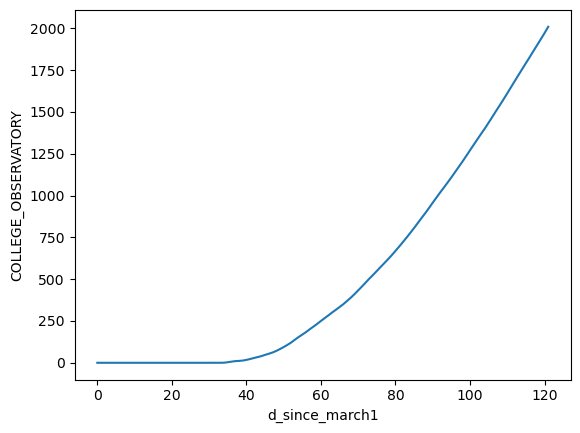

In [ ]:
sb.lineplot(data=testdf[stationname])

### Loop

In [ ]:
alldd = []
for fpth in stations_ddclim_list:
    stationname = fpth.stem[:-14]
    testdata = pd.read_csv(fpth, skiprows=4, index_col=0)
    testdf = pd.DataFrame(testdata['dd'].cumsum())
    testdf.columns = [stationname]
    alldd.append(testdf)

Text(0, 0.5, 'Degree days > 25 (F)')

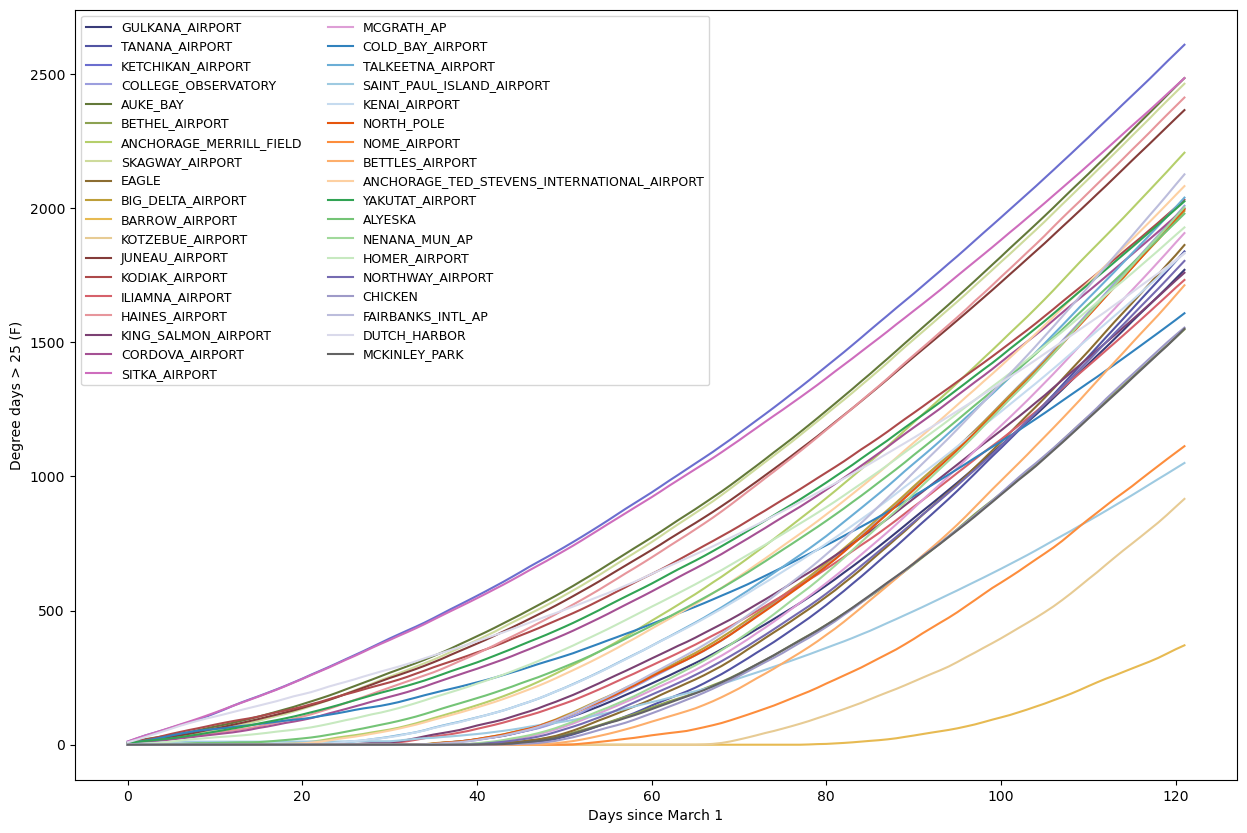

In [ ]:
clrs = plt.cm.rainbow(np.linspace(0, 1, len(alldd)))
clrs = plt.cm.tab20b.colors + plt.cm.tab20c.colors

fig, ax = plt.subplots(figsize=(15, 10))
pd.concat(alldd, axis=1).plot(ax=ax, legend=False, color=clrs)
ax.legend(fontsize=9, ncol=2, loc='upper left')
ax.set_xlabel('Days since March 1')
ax.set_ylabel(f'Degree days > {config[prefix]["deltaT"]} (F)')


In [ ]:
allcumulddds = pd.concat(alldd, axis=1)
allcumulddds

,GULKANA_AIRPORT,TANANA_AIRPORT,KETCHIKAN_AIRPORT,COLLEGE_OBSERVATORY,AUKE_BAY,BETHEL_AIRPORT,ANCHORAGE_MERRILL_FIELD,SKAGWAY_AIRPORT,EAGLE,BIG_DELTA_AIRPORT,...,ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT,YAKUTAT_AIRPORT,ALYESKA,NENANA_MUN_AP,HOMER_AIRPORT,NORTHWAY_AIRPORT,CHICKEN,FAIRBANKS_INTL_AP,DUTCH_HARBOR,MCKINLEY_PARK
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,11.30,0.00,7.10,0.00,0.00,5.31,0.00,0.00,...,0.00,5.87,1.11,0.00,0.97,0.00,0.00,0.00,8.86,0.00
1,0.00,0.00,22.65,0.00,14.24,0.00,0.00,10.66,0.00,0.00,...,0.00,10.47,1.34,0.00,2.81,0.00,0.00,0.00,18.21,0.00
2,0.00,0.00,34.33,0.00,20.65,0.00,0.00,16.14,0.00,0.00,...,0.00,13.95,1.36,0.00,4.50,0.00,0.00,0.00,28.46,0.00
3,0.00,0.00,43.84,0.00,25.70,0.00,0.00,20.49,0.00,0.00,...,0.00,16.90,1.41,0.00,5.71,0.00,0.00,0.00,38.73,0.00
4,0.00,0.00,53.42,0.00,30.60,0.00,0.00,24.07,0.00,0.00,...,0.00,20.42,1.46,0.00,8.42,0.00,0.00,0.00,49.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1640.43,1695.06,2482.02,1863.22,2355.59,1429.77,2067.13,2334.36,1718.14,1848.59,...,1948.71,1911.16,1854.28,1859.73,1814.11,1666.94,1439.68,1973.00,1734.20,1426.77
118,1672.22,1729.92,2514.10,1899.05,2387.85,1459.15,2101.76,2367.84,1753.60,1882.80,...,1981.83,1939.38,1885.47,1894.85,1842.23,1700.21,1469.68,2010.40,1757.52,1457.11
119,1704.05,1765.71,2546.48,1934.92,2420.80,1488.58,2136.26,2400.26,1789.71,1917.92,...,2015.31,1968.21,1916.29,1930.30,1871.23,1734.44,1499.42,2048.65,1781.57,1486.70


In [ ]:
outpath = PROJPATH / f"data/weatherstations/ACIS/{prefix}/"
fn = "all_cumul_clim1991_2020.csv"

with open(outpath / fn, 'w') as dst:
    dst.write(f"# All climatologies for cumulative degree days > {config[prefix]['deltaT']}, 1991-2020\n")
    dst.write(f"# Cumulative degree days starting March 1 from ACIS\n")
    dst.write("#\n")
    pd.concat(alldd, axis=1).to_csv(dst, float_format='%.2f')